# Création du dataset utilisé pour entraîner les modèles

In [2]:
# Importation des modules et packages
import shutil
import pathlib

import numpy as np
import pandas as pd

## 1 - Tomate

### 1.1 - Tomato Village dataset

In [3]:
# Source: Tomato-Village (Multi-label classification)
tomato_village = pd.read_csv(
    "../data/Tomato-Village-main/Variant-b(MultiLabel Classification)/Multi-Label dataset - with augmented.csv"
)

# On remplace les NaN par 0
tomato_village = tomato_village.fillna(0)

tomato_village

,dataset,filename,path,Early blight,Healthy,Late blight,Leaf Miner,Magnesium Deficiency,Nitrogen Deficiency,Pottassium Deficiency,Spotted Wilt Virus,SUM
0,test,IMG20220323100545_1.jpg,\test\Early_blight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,test,IMG20220323102226_1.jpg,\test\Early_blight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,test,IMG20220323102423_7.jpg,\test\Early_blight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,test,IMG20220323102851_4.jpg,\test\Early_blight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,test,IMG20220323103905_4.jpg,\test\Early_blight,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5648,val,IMG20220325134421.jpg,\val\Spotted Wilt Virus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5649,val,IMG20220325140005.jpg,\val\Spotted Wilt Virus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5650,val,IMG20220325142048.jpg,\val\Spotted Wilt Virus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5651,val,IMG20220324104742.jpg,\val\Spotted Wilt Virus_Magnesium Deficiency,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2


In [5]:
# Création d'un dataset multi-classe plutôt que multi-label
dataset = pd.DataFrame(columns=["filename", "source", "subset", "class"])

# Sélectionner les bonnes colonnes
cols = [
    "Healthy",
    "Early blight",
    "Late blight",
    "Leaf Miner",
    "Magnesium Deficiency",
    "Nitrogen Deficiency",
    "Pottassium Deficiency",
    "Spotted Wilt Virus",
]

# Classes
classes = [
    "healthy",
    "early_blight",
    "late_blight",
    "leaf_miner",
    "magnesium_deficiency",
    "nitrogen_deficiency",
    "potassium_deficiency",
    "spotted_wilt_virus",
]

tomato_village_dataset = []

for col, cls in zip(cols, classes):
    subset =tomato_village.loc[tomato_village[col] == 1]
    tmp_df = pd.DataFrame(
        {
            "filename": subset["filename"].str.replace(" ", "_"),
            "source": "tomato_village",
            "subset": None,
            "class": cls
        }
    )
    tomato_village_dataset.append(tmp_df)

tomato_village_dataset = pd.concat(tomato_village_dataset, axis=0, ignore_index=True)
tomato_village_dataset

,filename,source,subset,class
0,IMG20220324112244.jpg,tomato_village,None,healthy
1,IMG20220324113314.jpg,tomato_village,None,healthy
2,IMG20220324114017.jpg,tomato_village,None,healthy
3,IMG20220324120217.jpg,tomato_village,None,healthy
4,IMG20220324120941.jpg,tomato_village,None,healthy
...,...,...,...,...
6798,IMG20220325134421.jpg,tomato_village,None,spotted_wilt_virus
6799,IMG20220325140005.jpg,tomato_village,None,spotted_wilt_virus
6800,IMG20220325142048.jpg,tomato_village,None,spotted_wilt_virus
6801,IMG20220324104742.jpg,tomato_village,None,spotted_wilt_virus


In [10]:
# Show images with more than one class
tomato_village_dataset.loc[
    tomato_village_dataset.duplicated("filename", keep=False)
].sort_values("filename")

,filename,source,subset,class
5982,IMG20220323093233.jpg,tomato_village,None,spotted_wilt_virus
3128,IMG20220323093233.jpg,tomato_village,None,leaf_miner
2688,IMG20220323094010.jpg,tomato_village,None,leaf_miner
3996,IMG20220323094010.jpg,tomato_village,None,magnesium_deficiency
5983,IMG20220323094134.jpg,tomato_village,None,spotted_wilt_virus
...,...,...,...,...
3811,IMG20220325142529.jpg,tomato_village,None,leaf_miner
3050,IMG20220325142533.jpg,tomato_village,None,leaf_miner
4358,IMG20220325142533.jpg,tomato_village,None,magnesium_deficiency
4359,IMG20220325142557.jpg,tomato_village,None,magnesium_deficiency


In [11]:
# Copier les images de Tomato-Village
source = pathlib.Path(
    "../data/Tomato-Village-main/Variant-b(MultiLabel Classification)"
)
dest = pathlib.Path("tomato")

for file, sub in zip(tomato_village["filename"], tomato_village["dataset"]):
    if not (dest / file).exists():
        shutil.copy2(source / sub / file, dest / file.replace(" ", "_"))

### 1.2 - Dataset for Crop Pest and Disease Detection

On ne peut pas utiliser toutes les classes de ce dataset. Premièremente, la classe
"leaf blight" pourrait être causée par le "Early blight" ou "Late blight". Il faudrait
manuellemenet trouver les photos correspondant à chacune de ces deux divisions. Aussi,
il semble que "leaf curl" soit un symptôme qui peut être causé par plusieurs problèmes,
mais il existe un virus, le "yellow leaf curl virus" qui en est souvent la cause. On
va assumer pour ce projet que la classe "leaf curl" correspond à ce virus.

In [12]:
# Classes
classes = [
    "healthy",
    "leaf_blight",
    "yellow_leaf_curl_virus",
    "septoria_leaf_spot",
    "verticulium_wilt",
]

source_classes = [
    "healthy",
    "leaf curl",
    "leaf blight",
    "septoria leaf spot",
    "verticulium wilt"
]

sets = ["test_set", "train_set"]

# ccmt_dataset = pd.DataFrame(columns=["filename", "source"] + classes)
ccmt_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path(
    "../data/Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented/Tomato"
)
dest = pathlib.Path("tomato")

for c, sc in zip(classes, source_classes):
    for s in sets:
        files = list((source / s / sc).iterdir())
        filenames = [f.name.replace(" ", "_") for f in files]

        tmp_dataset = pd.DataFrame(
            {
                "filename": filenames,
                "source": "ccmt",
                "subset": None,
                "class": c
            },
        )

        ccmt_dataset.append(tmp_dataset)

        # Copie du fichier
        for f in files:
            if not (dest / f.name).exists():
                shutil.copy2(f, dest / f.name.replace(" ", "_"))


ccmt_dataset = pd.concat(ccmt_dataset, ignore_index=True)
ccmt_dataset

,filename,source,subset,class
0,104tomato_valid_healthy.JPG,ccmt,None,healthy
1,101tomato_valid_healthy.JPG,ccmt,None,healthy
2,106tomato_valid_healthy.JPG,ccmt,None,healthy
3,100tomato_valid_healthy.JPG,ccmt,None,healthy
4,105tomato_valid_healthy.JPG,ccmt,None,healthy
...,...,...,...,...
27163,998tomato_train_verticulium_wilt.JPG,ccmt,None,verticulium_wilt
27164,999tomato_train_verticulium_wilt.JPG,ccmt,None,verticulium_wilt
27165,9tomato_train_verticulium_wilt.JPG,ccmt,None,verticulium_wilt
27166,99tomato_train_verticulium_wilt.JPG,ccmt,None,verticulium_wilt


### 1.3 PlantDoc

In [14]:
# Classes
classes = [
    "healthy",
    "early_blight",
    "late_blight",
    "mosaic_virus",
    "yellow_leaf_curl_virus",
    "septoria_leaf_spot",
]

source_classes = [
    "Tomato leaf",
    "Tomato Early blight leaf",
    "Tomato leaf late blight",
    "Tomato leaf mosaic virus",
    "Tomato leaf yellow virus",
    "Tomato Septoria leaf spot",
]

sets = ["test", "train"]

# ccmt_dataset = pd.DataFrame(columns=["filename", "source"] + classes)
plantdoc_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path("../data/PlantDoc-Dataset-master")
dest = pathlib.Path("tomato")

for c, sc in zip(classes, source_classes):
    for s in sets:
        files = list((source / s / sc).iterdir())
        filenames = [f.name.replace(" ", "_") for f in files]

        tmp_dataset = pd.DataFrame(
            {
                "filename": filenames,
                "source": "plantdoc",
                "subset": None,
                "class": c
            },
        )

        tmp_dataset = tmp_dataset.drop_duplicates()
        plantdoc_dataset.append(tmp_dataset)

        # Copie du fichier
        for f in files:
            if not (dest / f.name).exists():
                shutil.copy2(f, dest / f.name.replace(" ", "_"))


plantdoc_dataset = pd.concat(plantdoc_dataset, ignore_index=True)
plantdoc_dataset

,filename,source,subset,class
0,1684.jpg,plantdoc,None,healthy
1,2013-08-20-06.jpg,plantdoc,None,healthy
2,90e2c0.jpg,plantdoc,None,healthy
3,DSCN1015.JPG.jpg,plantdoc,None,healthy
4,IMG_1246.jpg,plantdoc,None,healthy
...,...,...,...,...
538,tomatoseptorialeafspotjpg-788d20798a3c74e7.jpg,plantdoc,None,septoria_leaf_spot
539,vdu-tomato-sept-eb-285x300.jpg,plantdoc,None,septoria_leaf_spot
540,web1_copy_tomato-septoria-leaf-spot4.jpg,plantdoc,None,septoria_leaf_spot
541,x3-most-common-types-tomato-blight.jpg.pagespe...,plantdoc,None,septoria_leaf_spot


### 1.4 - Plant village dataset
Attention à la licence CC-BY-NC-SA...

In [15]:
# Classes
classes = [
    "healthy",
    "early_blight",
    "late_blight",
    "mosaic_virus",
    "yellow_leaf_curl_virus",
    "septoria_leaf_spot",
]

source_classes = [
    "Tomato___healthy",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Septoria_leaf_spot",
]


# ccmt_dataset = pd.DataFrame(columns=["filename", "source"] + classes)
plantvillage_dataset = []

# Copier les images et écrire dans le dataset
source = pathlib.Path("../data/plantvillage dataset/color/")
dest = pathlib.Path("tomato")

for c, sc in zip(classes, source_classes):
    files = list((source / sc).iterdir())
    filenames = [f.name.replace(" ", "_") for f in files]

    tmp_dataset = pd.DataFrame(
        {
            "filename": filenames,
            "source": "plant_village",
            "subset": None,
            "class": c
        },
    )

    plantvillage_dataset.append(tmp_dataset)

    # Copie du fichier
    for f in files:
        if not (dest / f.name).exists():
            shutil.copy2(f, dest / f.name.replace(" ", "_"))


plantvillage_dataset = pd.concat(plantvillage_dataset, ignore_index=True)
plantvillage_dataset

,filename,source,subset,class
0,000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL_L...,plant_village,None,healthy
1,000bf685-b305-408b-91f4-37030f8e62db___GH_HL_L...,plant_village,None,healthy
2,0031da2a-8edd-468f-a8b1-106657717a32___RS_HL_0...,plant_village,None,healthy
3,003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL_9...,plant_village,None,healthy
4,00bce074-967b-4d50-967a-31fdaa35e688___RS_HL_0...,plant_village,None,healthy
...,...,...,...,...
11996,ffbb4b17-6760-48fd-bbfa-70120a53db86___Matt.S_...,plant_village,None,septoria_leaf_spot
11997,ffcd08b6-6533-422a-a365-271e11890f98___Matt.S_...,plant_village,None,septoria_leaf_spot
11998,ffd3c6f3-17d3-45f1-a599-2623e111ec71___Matt.S_...,plant_village,None,septoria_leaf_spot
11999,ffe98ff9-be33-4e8f-82f0-7b7c21b02958___JR_Sept...,plant_village,None,septoria_leaf_spot


## 1.5 - Création du dataset provisoire

In [17]:
# Concaténation des dataframes
dataset = [tomato_village_dataset, ccmt_dataset, plantdoc_dataset, plantvillage_dataset]

dataset = pd.concat(dataset, axis=0, ignore_index=True)
dataset

,filename,source,subset,class
0,IMG20220324112244.jpg,tomato_village,None,healthy
1,IMG20220324113314.jpg,tomato_village,None,healthy
2,IMG20220324114017.jpg,tomato_village,None,healthy
3,IMG20220324120217.jpg,tomato_village,None,healthy
4,IMG20220324120941.jpg,tomato_village,None,healthy
...,...,...,...,...
46510,ffbb4b17-6760-48fd-bbfa-70120a53db86___Matt.S_...,plant_village,None,septoria_leaf_spot
46511,ffcd08b6-6533-422a-a365-271e11890f98___Matt.S_...,plant_village,None,septoria_leaf_spot
46512,ffd3c6f3-17d3-45f1-a599-2623e111ec71___Matt.S_...,plant_village,None,septoria_leaf_spot
46513,ffe98ff9-be33-4e8f-82f0-7b7c21b02958___JR_Sept...,plant_village,None,septoria_leaf_spot


In [18]:
# Drop duplicates and export
dataset = dataset.drop_duplicates()
dataset.to_csv("tomato_dataset.csv")

### 1.6 - Analyse du dataset

In [19]:
import pandas as pd
import PIL
import matplotlib.pyplot as plt

plt.rcParams["axes.autolimit_mode"] = "round_numbers"

# Lecture du dataset
dataset = pd.read_csv("tomato_dataset.csv", index_col=0)

In [36]:
# Nombre d'images par catégorie et par source
classes = dataset["class"].unique()

sources = ["ccmt", "plantdoc", "plant_village", "tomato_village"]

counts = dataset[["source", "class"]].groupby("source").value_counts().unstack(1, fill_value=0).loc[sources, classes]
counts


class,healthy,early_blight,late_blight,leaf_miner,magnesium_deficiency,nitrogen_deficiency,potassium_deficiency,spotted_wilt_virus,leaf_blight,yellow_leaf_curl_virus,septoria_leaf_spot,verticulium_wilt,mosaic_virus
source,,,,,,,,,,,,,
ccmt,2500,0,0,0,0,0,0,0,2582,6509,11713,3864,0
plantdoc,63,88,111,0,0,0,0,0,0,75,150,0,54
plant_village,1591,1000,1909,0,0,0,0,0,0,5357,1771,0,373
tomato_village,216,579,918,2101,1518,469,85,917,0,0,0,0,0


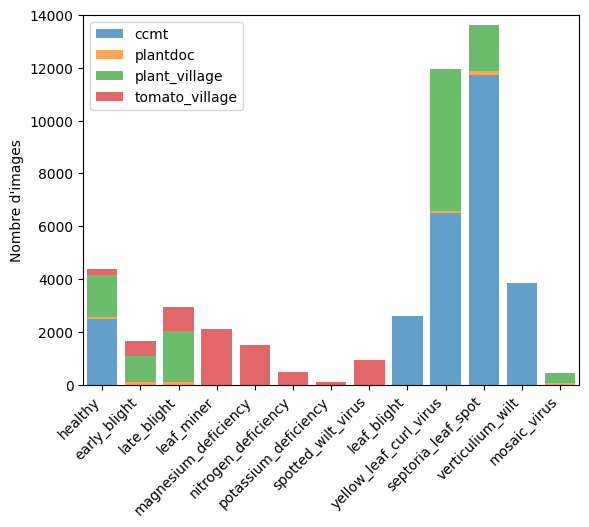

In [37]:
# Bar plot pour les totaux de chaque classe (par source)
fig, ax = plt.subplots()

bottom = np.zeros(len(classes))

x = np.arange(len(classes))

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

for i, src in enumerate(counts.index):
    values = counts.loc[src].values
    color = colors[i]
    ax.bar(x, values, bottom=bottom, label=src, color=(color, 0.7))
    bottom += values

ax.legend()
ax.set_xlim(-0.5, len(classes) - 0.5)
ax.set_xticks(x, labels=classes, rotation=45, ha="right")
ax.set_ylabel("Nombre d'images")

fig.savefig("analyse/tomato_dataset.png", dpi=300, bbox_inches="tight")

In [40]:
# Random number generator
rng = np.random.default_rng(3456789012)

size = 10
#fig, axes = plt.subplots(size, 12, figsize=(30, 20))

#dataset.query("healthy == 1")
path = pathlib.Path("tomato")

colors = {
    "ccmt": "tab:blue",
    "plantdoc": "tab:orange",
    "plant_village": "tab:green",
    "tomato_village": "tab:red",
}

for i, cls in enumerate(classes):
    fig, axes = plt.subplots(8, 8, figsize=(15, 15), layout="tight")
    subset = dataset.loc[dataset["class"] == cls]
    files = rng.choice(subset.index, size=len(axes.flatten()), replace=False)

    for j, file in enumerate(files):
        ax = axes.flatten()[j]

        filename = subset.loc[file, "filename"]
        source = subset.loc[file, "source"]

        img = np.asarray(PIL.Image.open(path / filename))
        ax.imshow(img)
        
        color = colors[source]
        ax.set_title(f"#{file} ({source})", color=color, fontsize=9)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        
        for spine in ax.spines:
            ax.spines[spine].set_color(color)
            ax.spines[spine].set_linewidth(2)

    fig.suptitle(f"Classe: {cls}", fontsize=16, fontweight="bold", x=0.5, y=1)
    fig.savefig(f"analyse/tomato_sample_{cls}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)



## 1.7 - Équilibrage et nettoyage des données

Il y a énormément d'images pour Septoria leaf spot dans le CCMT dataset, donc on va
utiliser les images non augmentée pour cette catégorie vu qu'il y en a suffisamment.
Aussi, on va exclure les images de PlantDoc car elles proviennent de Web Scraping et
contiennent une forte proportion d'images invalides...

In [41]:
import pandas as pd
import PIL
import matplotlib.pyplot as plt
import pathlib
import shutil

plt.rcParams["axes.autolimit_mode"] = "round_numbers"

# Lecture du dataset
dataset = pd.read_csv("tomato_dataset.csv", index_col=0)

On enlève les images du dataset PlantDoc et on met à jour le fichier csv du dataset.

In [42]:
# Remove plantdoc from dataset
dataset = dataset.query("source != 'plantdoc'")

On va enlever les images qui ne présentent qu'une déficience en potassium car il y en a
trop peu (72 images). On garde cependant les images qui ont une autre classe en plus
de la déficience.

In [43]:
# Images qui ont une déficience en potassium et aucune autre condition
dataset = dataset.loc[dataset["class"] != "potassium_deficiency"]

On enlève les images de "leaf curl" du CCMT dataset car elles semblent correspondent au
symptôme des feuilles courbées et non au virus jaune des feuilles courbées (yellow leaf
curl virus). De plus, cette catégorie contient déjà beaucoup d'images du dataset
PlantVillage.

In [44]:
# Remove leaf curl from dataset
dataset = dataset.loc[(dataset["source"] != "ccmt") | (dataset["class"] != "yellow_leaf_curl_virus")]

In [45]:
# On enlève pour l'instant le "leaf blight"
dataset = dataset.loc[dataset["class"] != "leaf_blight"]

On enlève les images du CCMT pour Septoria Leaf Spot car elles proviennent du dataset
augmenté et il y en a trop par rapport aux autres classes (11 713 images). On va ensuite les remplacer
par les images du dataset brut pour cette classe uniquement (2743 images).

In [46]:
# On enlève les images du CCMT pour Septoria Leaf Spot (11 713 images)
dataset = dataset.loc[(dataset["source"] != "ccmt") | (dataset["class"] != "septoria_leaf_spot")]


In [47]:
# Classes
classes = [
    #"healthy",
    #"yellow_leaf_curl_virus",
    "septoria_leaf_spot",
    #"verticulium_wilt",
]

source_classes = [
    #"healthy",
    #"leaf curl",
    "septoria leaf spot",
    #"verticulium wilt"
]

# On ajoute les images RAW du CCMT pour Septoria Leaf Spot  (2743 images)
source = pathlib.Path(
    "../data/Dataset for Crop Pest and Disease Detection/Raw Data/CCMT Dataset/Tomato/"
)

dest = pathlib.Path("tomato")

ccmt_raw_dataset = []

for c, sc in zip(classes, source_classes):
    files = list((source / sc).iterdir())
    filenames = [f.name.replace(" ", "_") for f in files]

    tmp_dataset = pd.DataFrame(
        {
            "filename": filenames,
            "source": "ccmt",
            "subset": None,
            "class": c
        },
    )

    ccmt_raw_dataset.append(tmp_dataset)

    # Copie du fichier
    for f in files:
        if not (dest / f.name).exists():
            shutil.copy2(f, dest / f.name.replace(" ", "_"))

ccmt_raw_dataset = pd.concat(ccmt_raw_dataset, ignore_index=True)
#ccmt_raw_dataset

In [ ]:
# On concatène le nouveau dataset
dataset = pd.concat([dataset, ccmt_raw_dataset], ignore_index=True)

In [50]:
# On regarde le nombre de fichiers
len(dataset["filename"].unique())

26689

On s'assure maintenant que le dossier "tomato" contient bien toutes les images du dataset,
et uniquement les images du dataset.

In [49]:
## On enlève les images du dossier qui ne sont plus dans le dataset
dataset_path = pathlib.Path("tomato")
dataset_files = dataset["filename"].values

for file in dataset_path.iterdir():
    if file.name not in dataset_files:
        file.unlink()


In [51]:
# On vérifie si toutes les images du dataset sont présentes dans le dossier
for file in dataset["filename"]:
    absent_files = []
    if not (dataset_path / file).exists():
        absent_files.append(file)

absent_files

[]

In [52]:
dataset.to_csv("tomato_dataset_clean.csv")
dataset

,filename,source,subset,class
0,IMG20220324112244.jpg,tomato_village,NaN,healthy
1,IMG20220324113314.jpg,tomato_village,NaN,healthy
2,IMG20220324114017.jpg,tomato_village,NaN,healthy
3,IMG20220324120217.jpg,tomato_village,NaN,healthy
4,IMG20220324120941.jpg,tomato_village,NaN,healthy
...,...,...,...,...
27821,septoria_leaf_spot2360_-ItGwon.jpg,ccmt,None,septoria_leaf_spot
27822,septoria_leaf_spot2361_-Qhvs8B.jpg,ccmt,None,septoria_leaf_spot
27823,septoria_leaf_spot2362_-2J6Hgl.jpg,ccmt,None,septoria_leaf_spot
27824,septoria_leaf_spot2363_-SC2TKR.jpg,ccmt,None,septoria_leaf_spot


## 1.8 - Analyse du dataset nettoyé

In [53]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt

plt.rcParams["axes.autolimit_mode"] = "round_numbers"

# Lecture du dataset
dataset = pd.read_csv("tomato_dataset_clean.csv", index_col=0)

In [57]:
# Nombre d'images par catégorie et par source
classes = dataset["class"].unique()

sources = ["ccmt", "plant_village", "tomato_village"]

counts = dataset[["source", "class"]].groupby("source").value_counts().unstack(1, fill_value=0).loc[sources, classes]
counts

class,healthy,early_blight,late_blight,leaf_miner,magnesium_deficiency,nitrogen_deficiency,spotted_wilt_virus,verticulium_wilt,mosaic_virus,yellow_leaf_curl_virus,septoria_leaf_spot
source,,,,,,,,,,,
ccmt,2500,0,0,0,0,0,0,3864,0,0,2743
plant_village,1591,1000,1909,0,0,0,0,0,373,5357,1771
tomato_village,216,579,918,2101,1518,469,917,0,0,0,0


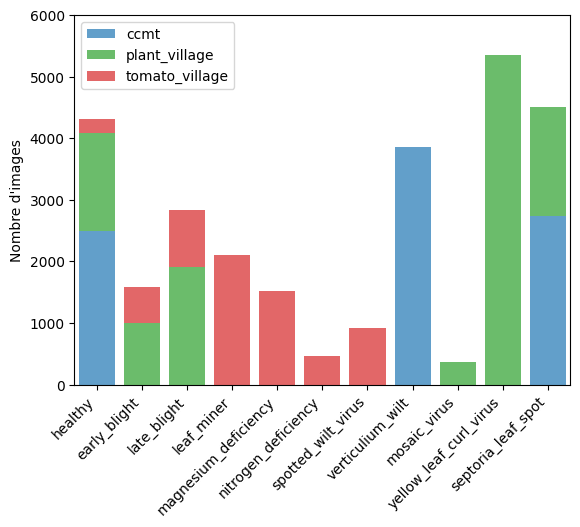

In [56]:
# Bar plot pour les totaux de chaque classe (par source)
fig, ax = plt.subplots()

bottom = np.zeros(len(classes))

x = np.arange(len(classes))

colors = ["tab:blue", "tab:green", "tab:red"]

for i, src in enumerate(counts.index):
    values = counts.loc[src].values
    color = colors[i]
    ax.bar(x, values, bottom=bottom, label=src, color=(color, 0.7))
    bottom += values

ax.legend()
ax.set_xlim(-0.5, len(classes) - 0.5)
ax.set_xticks(x, labels=classes, rotation=45, ha="right")
ax.set_ylabel("Nombre d'images")

fig.savefig("analyse/tomato_dataset_clean.png", dpi=300, bbox_inches="tight")

In [59]:
# Random number generator
rng = np.random.default_rng(7654321098)

size = 10
#fig, axes = plt.subplots(size, 12, figsize=(30, 20))

#dataset.query("healthy == 1")
path = pathlib.Path("tomato")

colors = {
    "ccmt": "tab:blue",
    #"plantdoc": "tab:orange",
    "plant_village": "tab:green",
    "tomato_village": "tab:red",
}

for i, cls in enumerate(classes):
    fig, axes = plt.subplots(8, 8, figsize=(15, 15), layout="tight")
    subset = dataset.loc[dataset["class"] == cls]
    files = rng.choice(subset.index, size=len(axes.flatten()), replace=False)

    for j, file in enumerate(files):
        ax = axes.flatten()[j]

        filename = subset.loc[file, "filename"]
        source = subset.loc[file, "source"]

        img = np.asarray(PIL.Image.open(path / filename))
        ax.imshow(img)
        
        color = colors[source]
        ax.set_title(f"#{file} ({source})", color=color, fontsize=9)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        
        for spine in ax.spines:
            ax.spines[spine].set_color(color)
            ax.spines[spine].set_linewidth(2)

    fig.suptitle(f"Classe: {cls}", fontsize=16, fontweight="bold", x=0.5, y=1)
    fig.savefig(f"analyse/tomato_sample_clean_{cls}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)



## 1.8 - Séparation du dataset de test et d'entraînement

In [67]:
# Random number generator
import sklearn
import pandas as pd

dataset = pd.read_csv("tomato_dataset_clean.csv", index_col=0)
dataset["subset"] = dataset["subset"].astype(str)
classes = dataset.columns.drop(["filename", "source"])

prop_test = 0.3

train_files, test_files = sklearn.model_selection.train_test_split(
    dataset["filename"].unique(),
    test_size=prop_test,
    shuffle=True,
    random_state=432109765,
    #stratify=dataset.drop_duplicates("filename")
)

dataset.loc[dataset["filename"].isin(train_files), "subset"] = "train"
dataset.loc[dataset["filename"].isin(test_files), "subset"] = "test"

train_dataset = dataset.query("subset == 'train'")
test_dataset = dataset.query("subset == 'test'")
test_dataset
    

,filename,source,subset,class
8,IMG20220324183802.jpg,tomato_village,test,healthy
11,IMG20220325133916.jpg,tomato_village,test,healthy
15,IMG20220325135437.jpg,tomato_village,test,healthy
16,IMG20220325135822.jpg,tomato_village,test,healthy
18,IMG20220325141447.jpg,tomato_village,test,healthy
...,...,...,...,...
27817,septoria_leaf_spot2356_-45mZ2T.jpg,ccmt,test,septoria_leaf_spot
27818,septoria_leaf_spot2357_-yOG8hQ.jpg,ccmt,test,septoria_leaf_spot
27819,septoria_leaf_spot2358_-x0cabs.jpg,ccmt,test,septoria_leaf_spot
27820,septoria_leaf_spot2359_-cnyW1F.jpg,ccmt,test,septoria_leaf_spot


On valide les proportions des classes et sources de chacun des sous-datasets.

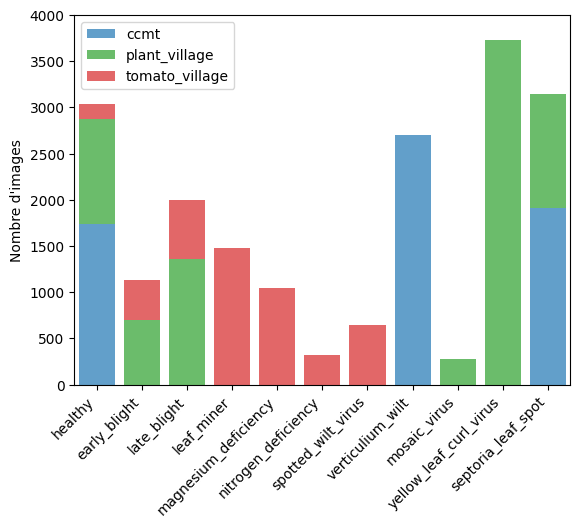

In [75]:
# Entraînement
# Nombre d'images par catégorie et par source
classes = dataset["class"].unique()
sources = ["ccmt", "plant_village", "tomato_village"]

counts = train_dataset[["source", "class"]].groupby("source").value_counts().unstack(1, fill_value=0).loc[sources, classes]

# Bar plot pour les totaux de chaque classe (par source)
fig, ax = plt.subplots()

bottom = np.zeros(len(classes))

x = np.arange(len(classes))

colors = ["tab:blue", "tab:green", "tab:red"]

for i, src in enumerate(counts.index):
    values = counts.loc[src].values
    color = colors[i]
    ax.bar(x, values, bottom=bottom, label=src, color=(color, 0.7))
    bottom += values

ax.legend()
ax.set_xlim(-0.5, len(classes) - 0.5)
ax.set_xticks(x, labels=classes, rotation=45, ha="right")
ax.set_ylabel("Nombre d'images")

fig.savefig("analyse/tomato_dataset_clean_train.png", dpi=300, bbox_inches="tight")

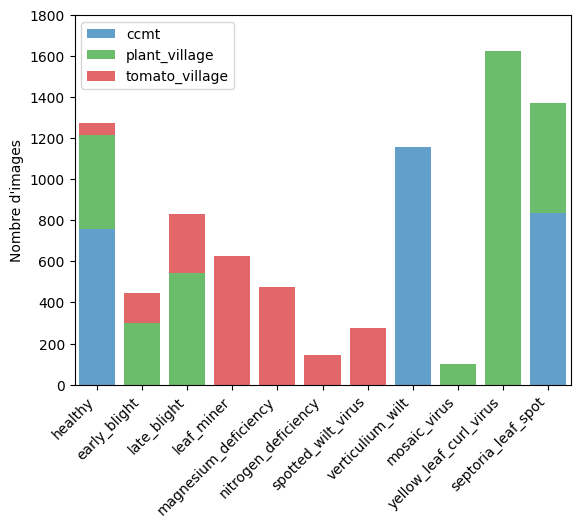

In [76]:
# Test
# Nombre d'images par catégorie et par source
classes = dataset["class"].unique()
sources = ["ccmt", "plant_village", "tomato_village"]

counts = test_dataset[["source", "class"]].groupby("source").value_counts().unstack(1, fill_value=0).loc[sources, classes]

# Bar plot pour les totaux de chaque classe (par source)
fig, ax = plt.subplots()

bottom = np.zeros(len(classes))

x = np.arange(len(classes))

colors = ["tab:blue", "tab:green", "tab:red"]

for i, src in enumerate(counts.index):
    values = counts.loc[src].values
    color = colors[i]
    ax.bar(x, values, bottom=bottom, label=src, color=(color, 0.7))
    bottom += values

ax.legend()
ax.set_xlim(-0.5, len(classes) - 0.5)
ax.set_xticks(x, labels=classes, rotation=45, ha="right")
ax.set_ylabel("Nombre d'images")

fig.savefig("analyse/tomato_dataset_clean_test.png", dpi=300, bbox_inches="tight")

In [78]:
# Export to csv
dataset.to_csv("tomato_dataset_clean_split.csv")

dataset

,filename,source,subset,class
0,IMG20220324112244.jpg,tomato_village,train,healthy
1,IMG20220324113314.jpg,tomato_village,train,healthy
2,IMG20220324114017.jpg,tomato_village,train,healthy
3,IMG20220324120217.jpg,tomato_village,train,healthy
4,IMG20220324120941.jpg,tomato_village,train,healthy
...,...,...,...,...
27821,septoria_leaf_spot2360_-ItGwon.jpg,ccmt,train,septoria_leaf_spot
27822,septoria_leaf_spot2361_-Qhvs8B.jpg,ccmt,train,septoria_leaf_spot
27823,septoria_leaf_spot2362_-2J6Hgl.jpg,ccmt,train,septoria_leaf_spot
27824,septoria_leaf_spot2363_-SC2TKR.jpg,ccmt,test,septoria_leaf_spot
